In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

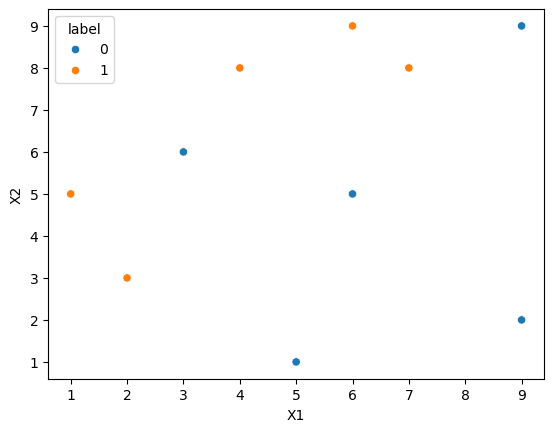

In [5]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue = df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [8]:
dt1 = DecisionTreeClassifier(max_depth = 1)

X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

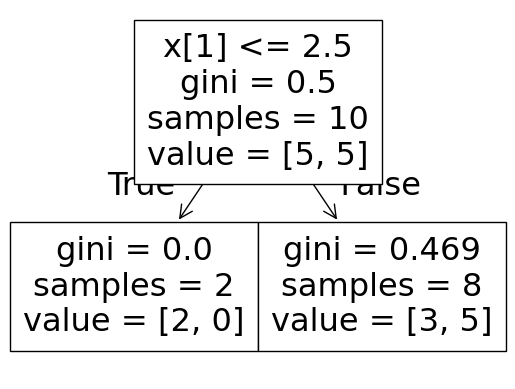

In [9]:
#train the first model
dt1.fit(X,y)
plot_tree(dt1)

<Axes: >

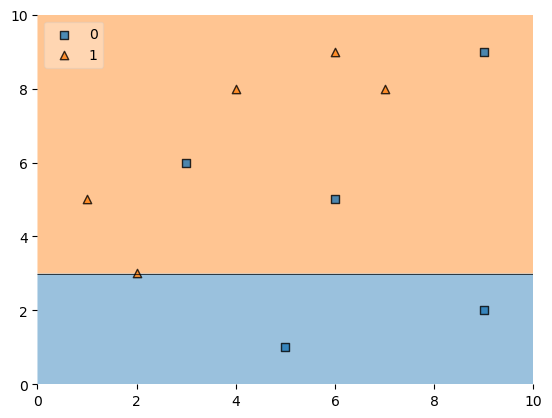

In [10]:
plot_decision_regions(X, y, clf = dt1, legend = 2)

In [11]:
df['y_pred'] = dt1.predict(X)

In [12]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [13]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

In [14]:
#calculate model wieghts
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [15]:
#update weights
def update_row_weights(row, alpha = 0.42364893019360184):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [16]:
df['updated_weights'] = df.apply(update_row_weights, axis = 1)

In [17]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [18]:
df['updated_weights'].sum()

np.float64(0.9165151389911682)

In [19]:
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()
df['normalized_weights'].sum()

np.float64(0.9999999999999999)

In [21]:
#Creating the ranges for normalized weights
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [22]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

### Upsampling

In [23]:
index_values = create_new_dataset(df)
index_values

[8, 8, 8, 0, 8, 1, 4, 5, 1, 5]

In [25]:
second_df = df.iloc[index_values, [0,1,2,3]]
second_df

,X1,X2,label,weights
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1


In [27]:
dt2 = DecisionTreeClassifier(max_depth = 1)

X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [28]:
dt2.fit(X,y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",1
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

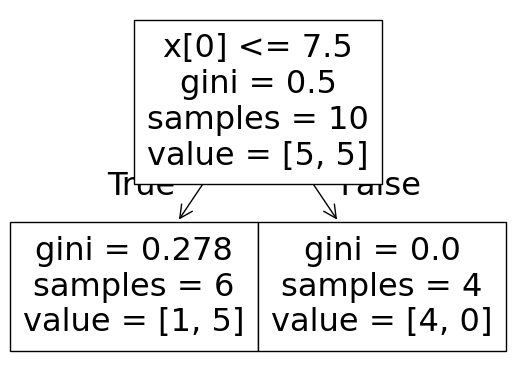

In [29]:
plot_tree(dt2)

<Axes: >

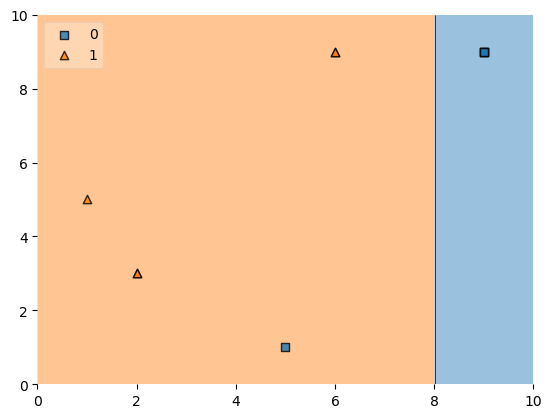

In [32]:
plot_decision_regions(X, y, clf = dt2, legend = 2)

In [33]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
1,2,3,1,0.1,1
4,5,1,0,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
5,6,9,1,0.1,1


In [34]:
alpha2 = calculate_model_weight(0.1)
alpha2

np.float64(1.0986122886681098)

In [36]:
#update weights
def update_row_weights(row, alpha = 1.0986122886681098):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [37]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis = 1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033333
8,9,9,0,0.1,0,0.033333
8,9,9,0,0.1,0,0.033333
0,1,5,1,0.1,1,0.033333
8,9,9,0,0.1,0,0.033333
1,2,3,1,0.1,1,0.033333
4,5,1,0,0.1,1,0.300000
5,6,9,1,0.1,1,0.033333
1,2,3,1,0.1,1,0.033333
5,6,9,1,0.1,1,0.033333


In [38]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()
second_df['normalized_weights'].sum()

np.float64(1.0000000000000002)

In [39]:
#Creating the ranges for normalized weights
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
8,9,9,0,0.1,0,0.033333,0.055556,0.055556,0.000000
8,9,9,0,0.1,0,0.033333,0.055556,0.111111,0.055556
8,9,9,0,0.1,0,0.033333,0.055556,0.166667,0.111111
0,1,5,1,0.1,1,0.033333,0.055556,0.222222,0.166667
8,9,9,0,0.1,0,0.033333,0.055556,0.277778,0.222222
1,2,3,1,0.1,1,0.033333,0.055556,0.333333,0.277778
4,5,1,0,0.1,1,0.300000,0.500000,0.833333,0.333333
5,6,9,1,0.1,1,0.033333,0.055556,0.888889,0.833333
1,2,3,1,0.1,1,0.033333,0.055556,0.944444,0.888889
5,6,9,1,0.1,1,0.033333,0.055556,1.000000,0.944444


In [40]:
index_values = create_new_dataset(second_df)
index_values

[8, 4, 4, 8, 8, 4, 4, 1, 8, 1]

In [41]:
#Prediction

query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [42]:
dt2.predict(query)

array([1])

In [43]:
alpha1 * 1 + alpha2 * 1

np.float64(1.5222612188617117)

In [44]:
np.sign(1.5222612188617117)

np.float64(1.0)